In [113]:
import numpy as np
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

class svm:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return (np.sign(approx),approx)

In [ ]:
X = iris.data[:, 1:3]
setosa = X[:50]
print(setosa)
versicolor = X[50:100]
virginica = X[100:]

random_setosa = random.choices(setosa,k=10)
random_versicolor = random.choices(versicolor,k=10)
random_virginica = random.choices(virginica,k=10)
X = np.concatenate((random_setosa,random_virginica),axis=0)
labels = []
for _ in range(len(random_setosa)):
    labels.append(1)
for _ in range(len(random_versicolor)):
    labels.append(-1)

y = np.array(labels)
clf = svm()
clf.fit(X,y)
print(clf.w, clf.b)
clf.predict([3.5 , 1.4])


In [129]:
def ovr(data1,datarest):
    labels = []
    for _ in data1:
        labels.append(1)
    for _ in datarest:
        labels.append(-1)
#     print(len(labels))
    labels = np.array(labels)
    join = np.concatenate((data1,datarest),axis=0)
    clf = svm()    
    clf.fit(join,labels)
    
    return clf

    

In [130]:
clf = ovr(X,random_versicolor)

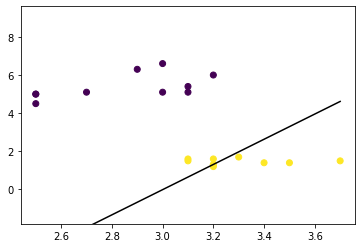

In [131]:
def visualize_svm():
     def get_hyperplane_value(x, w, b, offset):
          return (-w[0] * x + b + offset) / w[1]

     fig = plt.figure()
     ax = fig.add_subplot(1,1,1)
     plt.scatter(X[:,0], X[:,1], marker='o',c=y)

     x0_1 = np.amin(X[:,0])
     x0_2 = np.amax(X[:,0])

     x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
     x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

     x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
     x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

     x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
     x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

     ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
     ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
     ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

     x1_min = np.amin(X[:,1])
     x1_max = np.amax(X[:,1])
     ax.set_ylim([x1_min-3,x1_max+3])

     plt.show()

visualize_svm()